In [200]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV,cross_val_score, KFold
from sklearn.metrics import classification_report , accuracy_score , confusion_matrix , roc_curve ,auc 

In [4]:
df = pd.read_csv('diabetes.csv')

In [6]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [12]:
data = df.copy()

C:\Users\Sagar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Sagar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Sagar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Sagar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

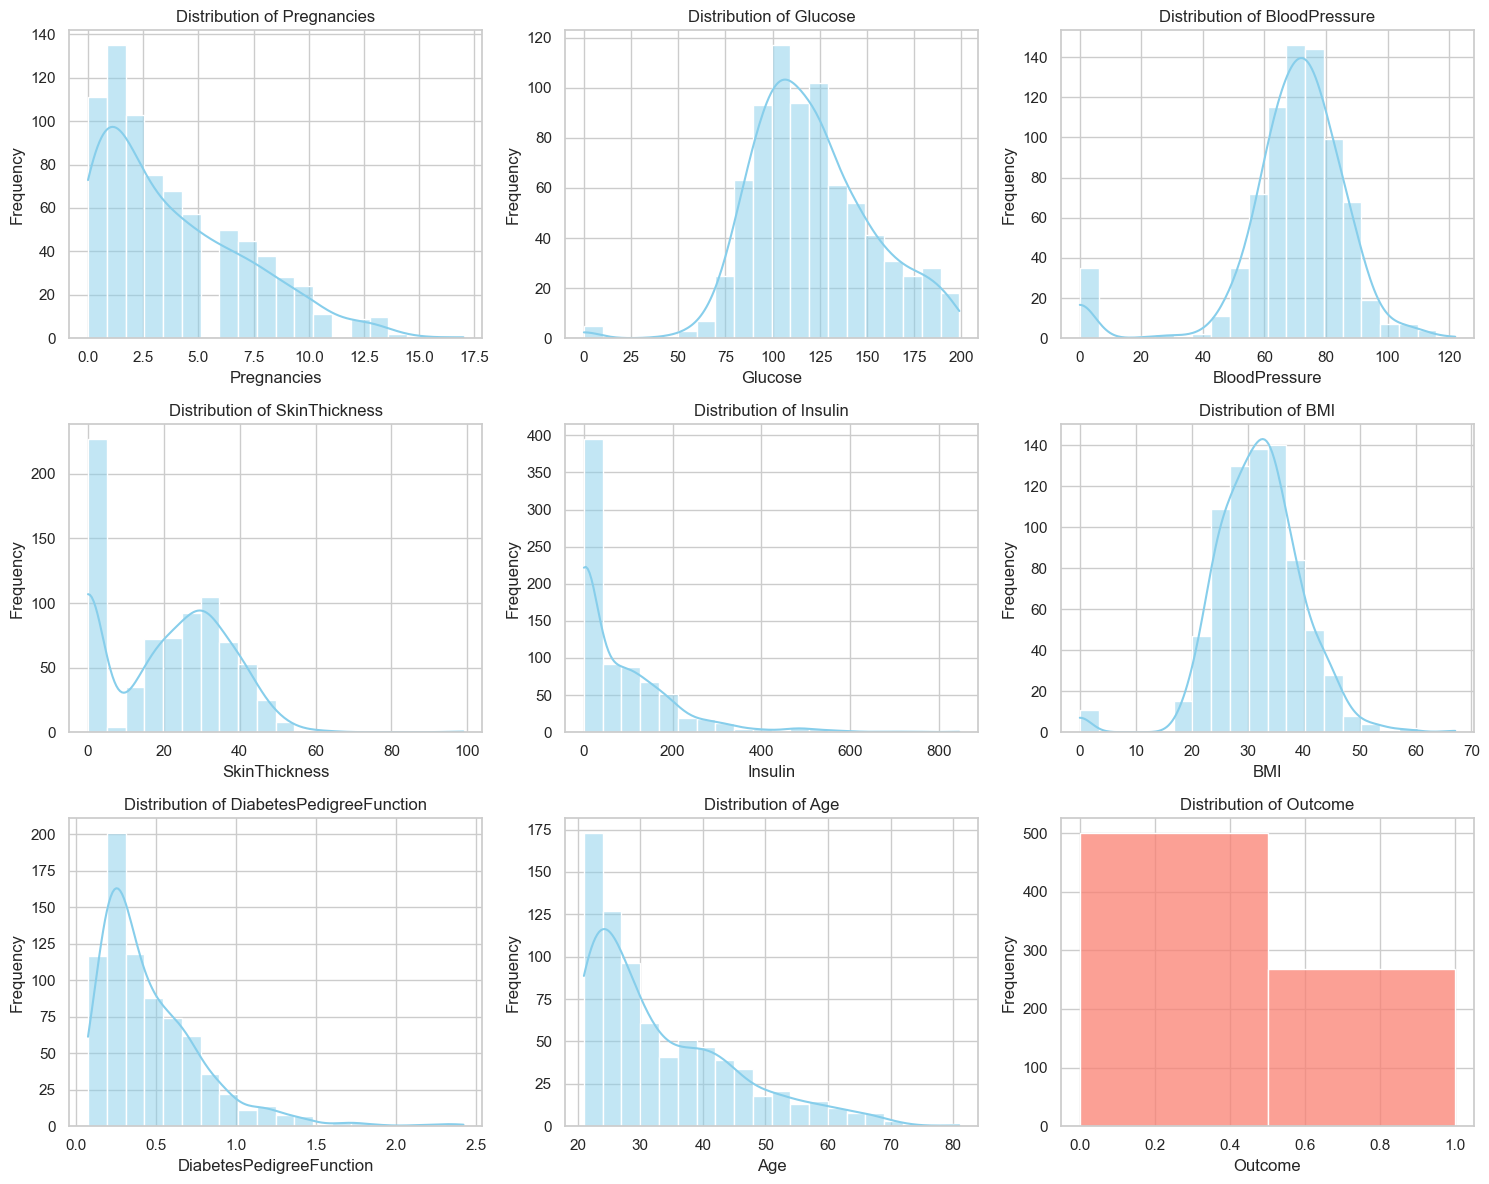

In [14]:

sns.set(style="whitegrid")


fig, axes = plt.subplots(3, 3, figsize=(15, 12))

columns = data.columns[:-1]  

# Plot histograms for each variable
for ax, column in zip(axes.flatten(), columns):
    sns.histplot(data[column], bins=20, kde=True, ax=ax, color='skyblue')
    ax.set_title(f'Distribution of {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')

# Plot for the 'Outcome' variable
sns.histplot(data['Outcome'], bins=2, kde=False, ax=axes[2, 2], color='salmon')
axes[2, 2].set_title('Distribution of Outcome')
axes[2, 2].set_xlabel('Outcome')
axes[2, 2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


In [16]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [18]:
missing_values = data.isnull().sum()

zero_value_columns = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

zero_value_percentages = data[zero_value_columns].apply(lambda col: (col == 0).mean() * 100)

missing_values, zero_value_percentages


(Pregnancies                 0
 Glucose                     0
 BloodPressure               0
 SkinThickness               0
 Insulin                     0
 BMI                         0
 DiabetesPedigreeFunction    0
 Age                         0
 Outcome                     0
 dtype: int64,
 Glucose           0.651042
 BloodPressure     4.557292
 SkinThickness    29.557292
 Insulin          48.697917
 BMI               1.432292
 dtype: float64)

In [88]:
X = data.drop(columns='Outcome')
y=data['Outcome']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size =0.2 ,random_state=42)


In [90]:
dt = DecisionTreeClassifier(random_state = 42)

In [154]:
param_grid = {
    'max_depth' : [3,4,5,None],
    'min_samples_split' : [2,5,10],
    'min_samples_leaf' : [4,6,8,10,12,14]
}

In [156]:
grid_search = GridSearchCV(dt, param_grid=param_grid, cv=5, scoring='accuracy',n_jobs=-1,verbose=1)

In [158]:
X_train.shape,y_train.shape

((614, 8), (614,))

In [160]:
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [3, 4, 5, None],
                         'min_samples_leaf': [4, 6, 8, 10, 12, 14],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy', verbose=1)

In [162]:
best_params = grid_search.best_params_
best_score = grid_search.best_score_

In [164]:
print(best_params,best_score)

{'max_depth': 4, 'min_samples_leaf': 12, 'min_samples_split': 2} 0.7703718512594961


In [166]:
best_dt = grid_search.best_estimator_
y_pred = best_dt.predict(X_test)

In [168]:
report = classification_report(y_test,y_pred)
accuracy = accuracy_score(y_test,y_pred)

In [170]:
print(report,accuracy)

              precision    recall  f1-score   support

           0       0.78      0.74      0.76        99
           1       0.57      0.64      0.60        55

    accuracy                           0.70       154
   macro avg       0.68      0.69      0.68       154
weighted avg       0.71      0.70      0.70       154
 0.7012987012987013


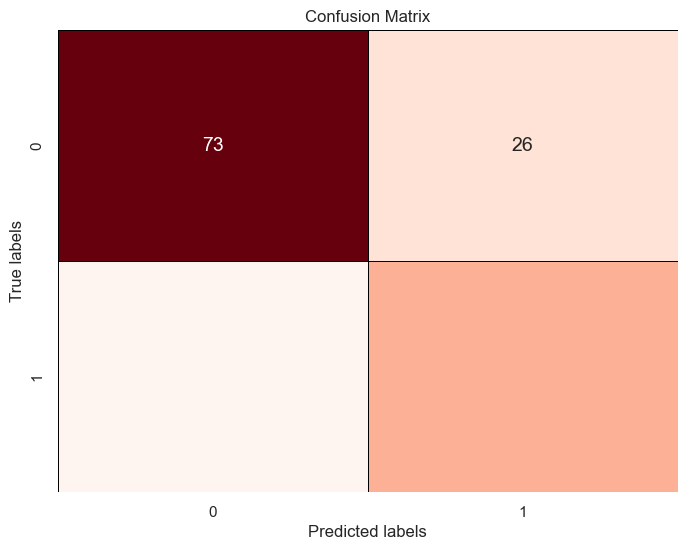

In [192]:
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Reds', fmt='g', cbar=False,
            annot_kws={'size': 14}, linewidths=0.5, linecolor='black')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

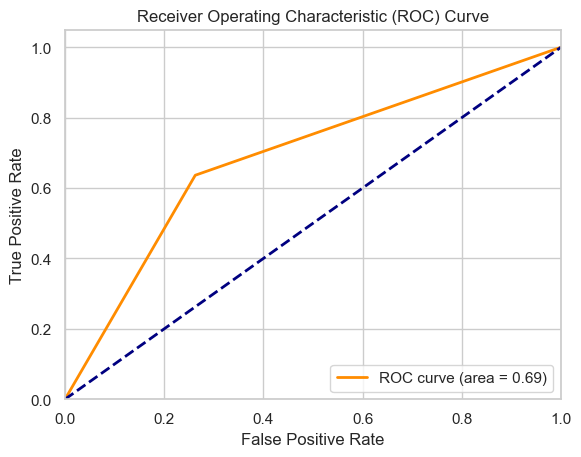

In [196]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [208]:
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(dt, X, y, cv=kfold, scoring='accuracy')


print("Cross-Validation Scores:")
print(cv_scores)
print("Mean Accuracy:", cv_scores.mean())

Cross-Validation Scores:
[0.74675325 0.72077922 0.72727273 0.71895425 0.7254902 ]
Mean Accuracy: 0.7278499278499279


In [206]:
X_scenario = X.copy()  


X_scenario['Glucose'] += 5  


scenario_pred = best_dt.predict(X_scenario)
scenario_accuracy = accuracy_score(y, scenario_pred)

print("Scenario Testing Accuracy:", scenario_accuracy)

Scenario Testing Accuracy: 0.7578125
